In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({13: 328, 0: 312, 2: 272, 11: 249, 7: 219, 12: 210, 5: 199, 3: 198, 10: 187, 9: 182, 6: 181, 15: 170, 14: 169, 4: 142, 1: 141, 8: 133})


In [7]:
smote = SMOTE(random_state=42)

In [8]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [9]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({2: 328, 15: 328, 3: 328, 11: 328, 9: 328, 13: 328, 0: 328, 6: 328, 10: 328, 8: 328, 7: 328, 14: 328, 12: 328, 5: 328, 1: 328, 4: 328})


In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [11]:
print(f"Random Forest's acc: {acc}")

Random Forest's acc: 0.7851941747572816


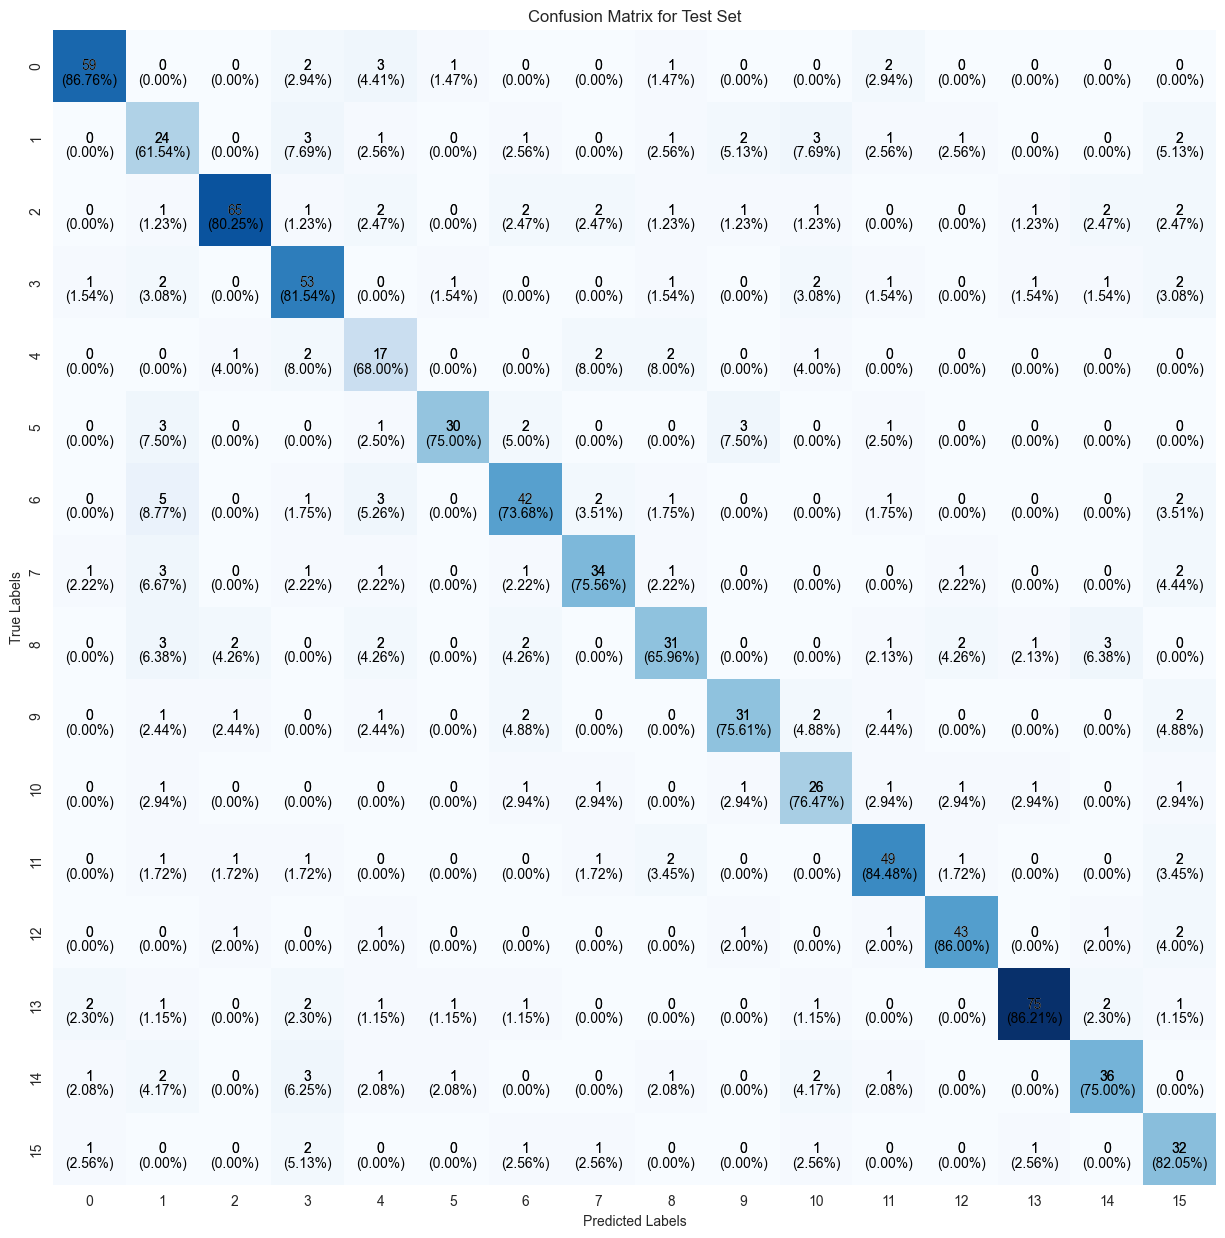

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        68
           1       0.51      0.62      0.56        39
           2       0.92      0.80      0.86        81
           3       0.75      0.82      0.78        65
           4       0.50      0.68      0.58        25
           5       0.88      0.75      0.81        40
           6       0.76      0.74      0.75        57
           7       0.79      0.76      0.77        45
           8       0.74      0.66      0.70        47
           9       0.79      0.76      0.78        41
          10       0.67      0.76      0.71        34
          11       0.82      0.84      0.83        58
          12       0.88      0.86      0.87        50
          13       0.94      0.86      0.90        87
          14       0.80      0.75      0.77        48
          15       0.64      0.82      0.72        39

    accuracy                           0.79       824
   macro avg       0.77   

In [14]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [15]:
print("\n--- Top 5 Yếu tố quan trọng nhất ---")
print(feature_imp.head(5))


--- Top 5 Yếu tố quan trọng nhất ---
Self-transcendence    0.079941
Conversation          0.075088
Openness to Change    0.072426
Openness              0.069657
soft_skill_score      0.069242
dtype: float64


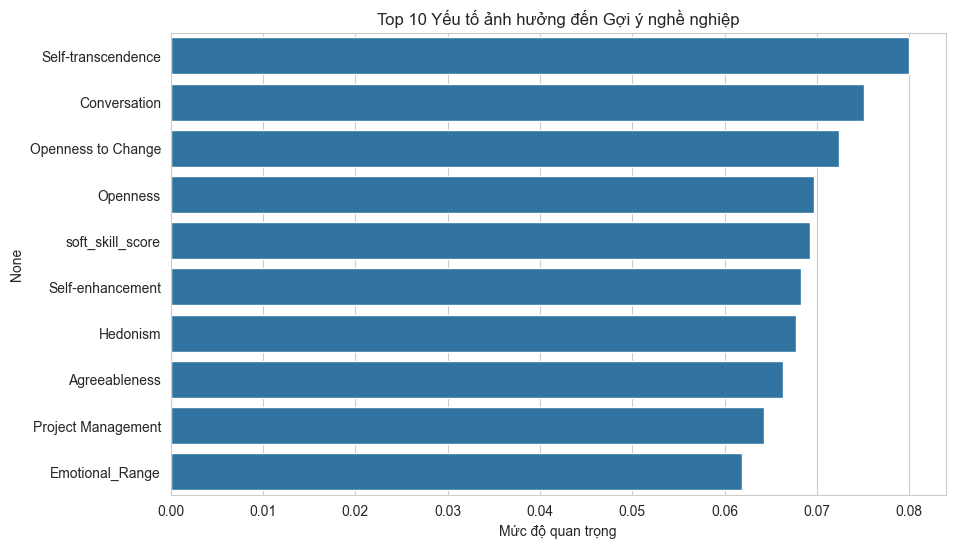

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Top 10 Yếu tố ảnh hưởng đến Gợi ý nghề nghiệp")
plt.xlabel("Mức độ quan trọng")
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping1.csv")

In [18]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [19]:
y = df['Role_encoded']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({13: 328, 0: 312, 2: 272, 11: 249, 7: 219, 12: 210, 5: 199, 3: 198, 10: 187, 9: 182, 6: 181, 15: 170, 14: 169, 4: 142, 1: 141, 8: 133})


In [22]:
smote = SMOTE(random_state=42)

In [23]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({2: 328, 15: 328, 3: 328, 11: 328, 9: 328, 13: 328, 0: 328, 6: 328, 10: 328, 8: 328, 7: 328, 14: 328, 12: 328, 5: 328, 1: 328, 4: 328})


In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [26]:
print(f"Random Forest's acc: {acc}")

Random Forest's acc: 0.7864077669902912


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        68
           1       0.48      0.64      0.55        39
           2       0.91      0.79      0.85        81
           3       0.86      0.83      0.84        65
           4       0.45      0.72      0.55        25
           5       0.86      0.75      0.80        40
           6       0.69      0.74      0.71        57
           7       0.72      0.76      0.74        45
           8       0.82      0.68      0.74        47
           9       0.76      0.76      0.76        41
          10       0.68      0.76      0.72        34
          11       0.78      0.81      0.80        58
          12       0.96      0.86      0.91        50
          13       0.93      0.86      0.89        87
          14       0.88      0.75      0.81        48
          15       0.65      0.82      0.73        39

    accuracy                           0.79       824
   macro avg       0.77   

In [28]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [29]:
print("\n--- Top 5 Yếu tố quan trọng nhất ---")
print(feature_imp.head(5))


--- Top 5 Yếu tố quan trọng nhất ---
Self-transcendence    0.086338
Conversation          0.083503
Agreeableness         0.081540
Openness              0.076894
Hedonism              0.075920
dtype: float64


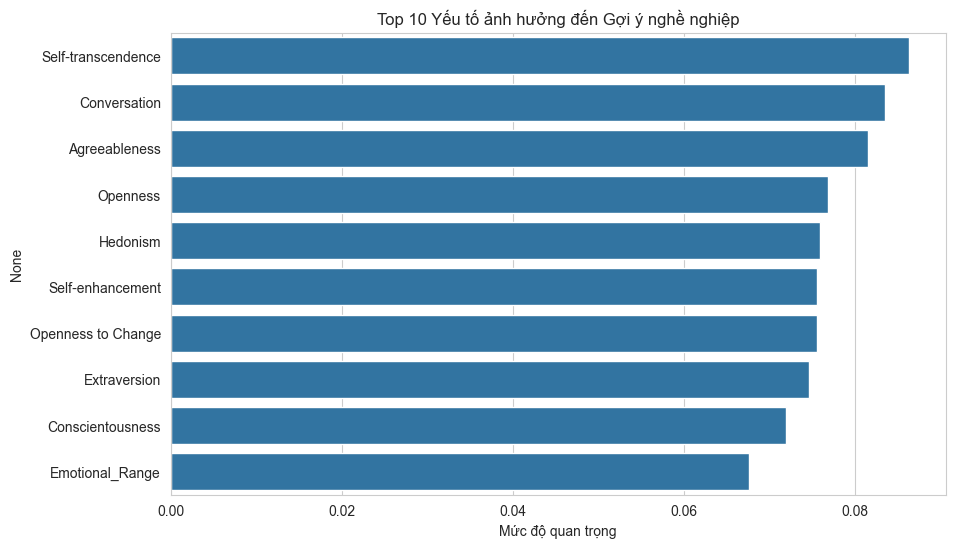

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Top 10 Yếu tố ảnh hưởng đến Gợi ý nghề nghiệp")
plt.xlabel("Mức độ quan trọng")
plt.show()